# What Is Machine Learning?

Before we take a look at the details of several machine learning methods, let's start by looking at what machine learning is, and what it isn't.
Machine learning is often categorized as a subfield of artificial intelligence, but I find that categorization can be misleading.
The study of machine learning certainly arose from research in this context, but in the data science application of machine learning methods, it's more helpful to think of machine learning as a means of *building models of data*.

In this context, "learning" enters the fray when we give these models *tunable parameters* that can be adapted to observed data; in this way the program can be considered to be "learning" from the data.
Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.
I'll leave to the reader the more philosophical digression regarding the extent to which this type of mathematical, model-based "learning" is similar to the "learning" exhibited by the human brain.

Understanding the problem setting in machine learning is essential to using these tools effectively, and so we will start with some broad categorizations of the types of approaches we'll discuss here.

## Categories of Machine Learning

Machine learning can be categorized into two main types: **supervised** learning and **unsupervised** learning.

*Supervised learning* involves somehow modeling the relationship between measured features of data and some labels associated with the data; once this model is determined, it can be used to apply labels to new, unknown data.
This is sometimes further subdivided into classification tasks and regression tasks: in *classification*, the labels are discrete categories, while in *regression*, the labels are continuous quantities.
You will see examples of both types of supervised learning in the following section.

*Unsupervised learning* involves modeling the features of a dataset without reference to any label.
These models include tasks such as *clustering* and *dimensionality reduction.*
Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data.
You will also see examples of both types of unsupervised learning in the following section.

In addition, there are so-called *semi-supervised learning* methods, which fall somewhere between supervised learning and unsupervised learning.
Semi-supervised learning methods are often useful when only incomplete labels are available.

## Qualitative Examples of Machine Learning Applications

To make these ideas more concrete, let's take a look at a few very simple examples of a machine learning task.
These examples are meant to give an intuitive, non-quantitative overview of the types of machine learning tasks we will be looking at in this part of the book.
In later chapters, we will go into more depth regarding the particular models and how they are used.
For a preview of these more technical aspects, you can find the Python source that generates the following figures in the online [appendix](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb).


### Classification: Predicting Discrete Labels

We will first take a look at a simple classification task, in which we are given a set of labeled points and want to use these to classify some unlabeled points.

Imagine that we have the data shown in this figure:

In [7]:
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

In [14]:
# import make_blobs new version see link https://www.datasciencelearner.com/python-exceptions/modulenotfounderror/no-module-named-sklearn-datasets-samples_generator-solved/
from sklearn.datasets import make_blobs
#import matplotlib.pyplot as plt
from sklearn.svm import SVC

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

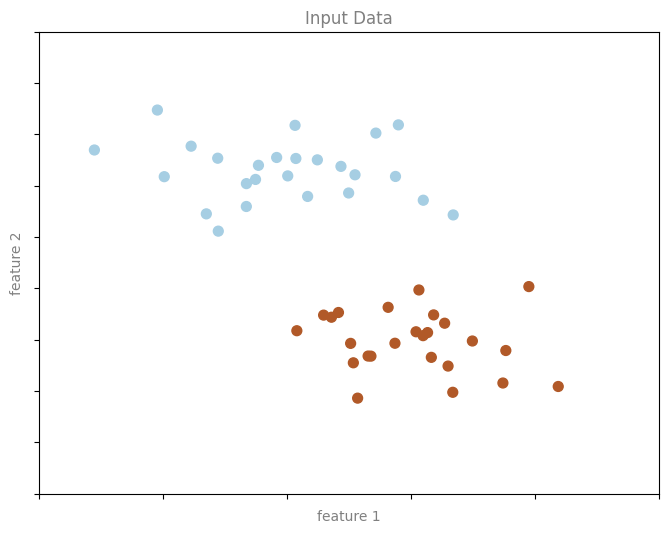

In [15]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])

fig.savefig('figures/05.01-classification-1.png')

![](images/05.01-classification-1.png)

This data is two-dimensional: that is, we have two *features* for each point, represented by the (x,y) positions of the points on the plane.
In addition, we have one of two *class labels* for each point, here represented by the colors of the points.
From these features and labels, we would like to create a model that will let us decide whether a new point should be labeled "blue" or "red."

There are a number of possible models for such a classification task, but we will start with a very simple one. We will make the assumption that the two groups can be separated by drawing a straight line through the plane between them, such that points on each side of the line all fall in the same group.
Here the *model* is a quantitative version of the statement "a straight line separates the classes," while the *model parameters* are the particular numbers describing the location and orientation of that line for our data.
The optimal values for these model parameters are learned from the data (this is the "learning" in machine learning), which is often called *training the model*.

See the following figure shows a visual representation of what the trained model looks like for this data.

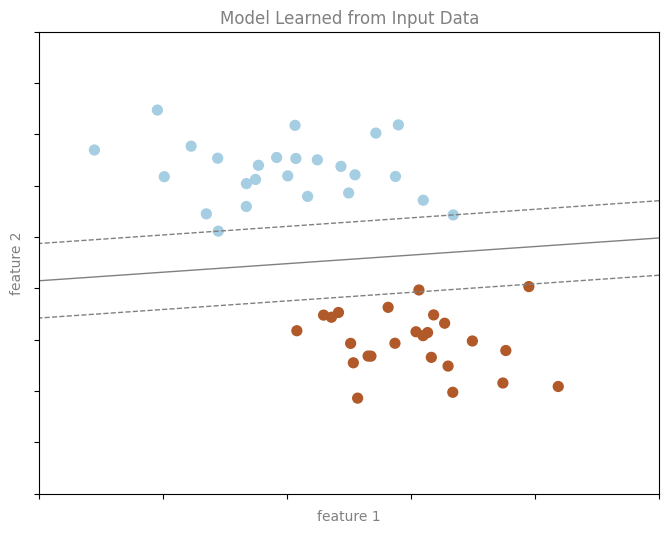

In [16]:
# Get contours describing the model
import numpy as np
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

# format plot
format_plot(ax, 'Model Learned from Input Data')
ax.axis([-1, 4, -2, 7])

fig.savefig('figures/05.01-classification-2.png')

![](images/05.01-classification-2.png)

Now that this model has been trained, it can be generalized to new, unlabeled data.
In other words, we can take a new set of data, draw this line through it, and assign labels to the new points based on this model (see the following figure).
This stage is usually called *prediction*.

C:\Users\Steve\AppData\Local\Temp\ipykernel_40580\3580052162.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)


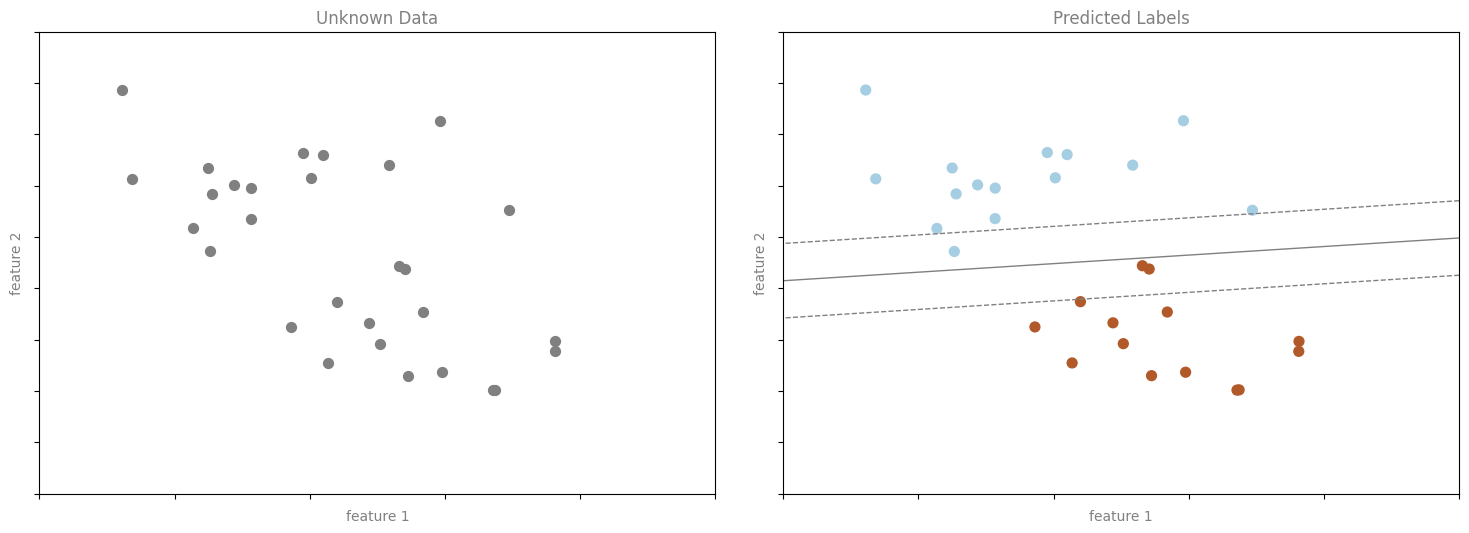

In [17]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)
ax[0].axis([-1, 4, -2, 7])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1, 4, -2, 7])

format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')

fig.savefig('figures/05.01-classification-3.png')

![](images/05.01-classification-3.png)

This is the basic idea of a classification task in machine learning, where "classification" indicates that the data has discrete class labels.
At first glance this may seem trivial: it's easy to look at our data and draw such a discriminatory line to accomplish this classification.
A benefit of the machine learning approach, however, is that it can generalize to much larger datasets in many more dimensions.

For example, this is similar to the task of automated spam detection for email. In this case, we might use the following features and labels:

- *feature 1*, *feature 2*, etc. $\to$ normalized counts of important words or phrases ("Viagra", "Extended warranty", etc.)
- *label* $\to$ "spam" or "not spam"

For the training set, these labels might be determined by individual inspection of a small representative sample of emails; for the remaining emails, the label would be determined using the model.
For a suitably trained classification algorithm with enough well-constructed features (typically thousands or millions of words or phrases), this type of approach can be very effective.
We will see an example of such text-based classification in [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb).

Some important classification algorithms that we will discuss in more detail are Gaussian naive Bayes (see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb)), support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), and random forest classification (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)).

### Regression: Predicting Continuous Labels

In contrast with the discrete labels of a classification algorithm, we will next look at a simple regression task in which the labels are continuous quantities.

Consider the data shown in the following figure, which consists of a set of points each with a continuous label.

In [21]:
from sklearn.linear_model import LinearRegression

# Create some data for the regression
rng = np.random.RandomState(1) # seed random number generator

X = rng.randn(200, 2) # 200 points in 2 dimensions
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0]) # y = -2X_0 + 1X_1 + noise

# fit the regression model
model = LinearRegression() # create a linear regression model instance
model.fit(X, y) # fit the model to data

# create some new points to predict
X2 = rng.randn(100, 2) # 100 new points in 2 dimensions

# predict the labels
y2 = model.predict(X2) # predict the value of the new points

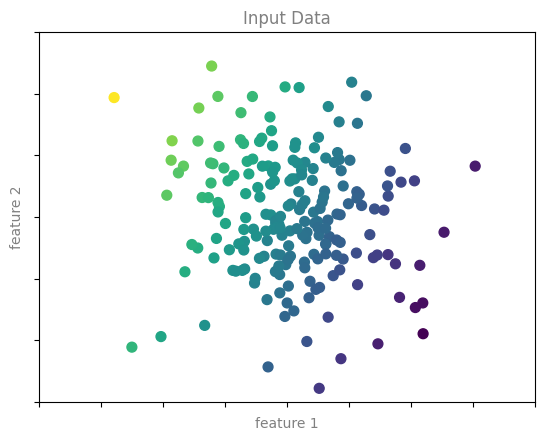

In [22]:
# plot data points
fig, ax = plt.subplots()
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                    cmap='viridis')

# format plot
format_plot(ax, 'Input Data')
ax.axis([-4, 4, -3, 3])

fig.savefig('figures/05.01-regression-1.png')

![](images/05.01-regression-1.png)

As with the classification example, we have two-dimensional data: that is, there are two features describing each data point.
The color of each point represents the continuous label for that point.

There are a number of possible regression models we might use for this type of data, but here we will use a simple linear regression model to predict the points.
This simple model assumes that if we treat the label as a third spatial dimension, we can fit a plane to the data.
This is a higher-level generalization of the well-known problem of fitting a line to data with two coordinates.

We can visualize this setup as shown in the following figure:

![](images/05.01-regression-2.png)

Notice that the *feature 1–feature 2* plane here is the same as in the two-dimensional plot in Figure 37-4; in this case, however, we have represented the labels by both color and three-dimensional axis position.
From this view, it seems reasonable that fitting a plane through this three-dimensional data would allow us to predict the expected label for any set of input parameters.
Returning to the two-dimensional projection, when we fit such a plane we get the result shown in the following figure:

![](images/05.01-regression-3.png)

This plane of fit gives us what we need to predict labels for new points.
Visually, we find the results shown in the following figure:

![](images/05.01-regression-4.png)

As with the classification example, this task may seem trivial in a low number of dimensions.
But the power of these methods is that they can be straightforwardly applied and evaluated in the case of data with many, many features.

For example, this is similar to the task of computing the distance to galaxies observed through a telescope—in this case, we might use the following features and labels:

- *feature 1*, *feature 2*, etc. $\to$ brightness of each galaxy at one of several wavelengths or colors
- *label* $\to$ distance or redshift of the galaxy

The distances for a small number of these galaxies might be determined through an independent set of (typically more expensive or complex) observations.
Distances to remaining galaxies could then be estimated using a suitable regression model, without the need to employ the more expensive observation across the entire set.
In astronomy circles, this is known as the "photometric redshift" problem.

Some important regression algorithms that we will discuss are linear regression (see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb)), support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), and random forest regression (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)).

### Clustering: Inferring Labels on Unlabeled Data

The classification and regression illustrations we just saw are examples of supervised learning algorithms, in which we are trying to build a model that will predict labels for new data.
Unsupervised learning involves models that describe data without reference to any known labels.

One common case of unsupervised learning is "clustering," in which data is automatically assigned to some number of discrete groups.
For example, we might have some two-dimensional data like that shown in the following figure:

![](images/05.01-clustering-1.png)

By eye, it is clear that each of these points is part of a distinct group.
Given this input, a clustering model will use the intrinsic structure of the data to determine which points are related.
Using the very fast and intuitive *k*-means algorithm (see [In Depth: K-Means Clustering](05.11-K-Means.ipynb)), we find the clusters shown in the following figure:

![](images/05.01-clustering-2.png)

*k*-means fits a model consisting of *k* cluster centers; the optimal centers are assumed to be those that minimize the distance of each point from its assigned center.
Again, this might seem like a trivial exercise in two dimensions, but as our data becomes larger and more complex such clustering algorithms can continue to be employed to extract useful information from the dataset.

We will discuss the *k*-means algorithm in more depth in [In Depth: K-Means Clustering](05.11-K-Means.ipynb).
Other important clustering algorithms include Gaussian mixture models (see [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb)) and spectral clustering (see [Scikit-Learn's clustering documentation](http://scikit-learn.org/stable/modules/clustering.html)).

### Dimensionality Reduction: Inferring Structure of Unlabeled Data

Dimensionality reduction is another example of an unsupervised algorithm, in which labels or other information are inferred from the structure of the dataset itself.
Dimensionality reduction is a bit more abstract than the examples we looked at before, but generally it seeks to pull out some low-dimensional representation of data that in some way preserves relevant qualities of the full dataset.
Different dimensionality reduction routines measure these relevant qualities in different ways, as we will see in [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb).

As an example of this, consider the data shown in the following figure:

![](images/05.01-dimesionality-1.png)

Visually, it is clear that there is some structure in this data: it is drawn from a one-dimensional line that is arranged in a spiral within this two-dimensional space.
In a sense, you could say that this data is "intrinsically" only one-dimensional, though this one-dimensional data is embedded in two-dimensional space.
A suitable dimensionality reduction model in this case would be sensitive to this nonlinear embedded structure and be able to detect this lower-dimensionality representation.

The following figure shows a visualization of the results of the Isomap algorithm, a manifold learning algorithm that does exactly this.

![](images/05.01-dimesionality-2.png)

Notice that the colors (which represent the extracted one-dimensional latent variable) change uniformly along the spiral, which indicates that the algorithm did in fact detect the structure we saw by eye.
As with the previous examples, the power of dimensionality reduction algorithms becomes clearer in higher-dimensional cases.
For example, we might wish to visualize important relationships within a dataset that has 100 or 1,000 features.
Visualizing 1,000-dimensional data is a challenge, and one way we can make this more manageable is to use a dimensionality reduction technique to reduce the data to 2 or 3 dimensions.

Some important dimensionality reduction algorithms that we will discuss are principal component analysis (see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)) and various manifold learning algorithms, including Isomap and locally linear embedding (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)).

## Summary

Here we have seen a few simple examples of some of the basic types of machine learning approaches.
Needless to say, there are a number of important practical details that we have glossed over, but this chapter was designed to give you a basic idea of what types of problems machine learning approaches can solve.

In short, we saw the following:

- *Supervised learning*: Models that can predict labels based on labeled training data

  - *Classification*: Models that predict labels as two or more discrete categories
  - *Regression*: Models that predict continuous labels
  
- *Unsupervised learning*: Models that identify structure in unlabeled data

  - *Clustering*: Models that detect and identify distinct groups in the data
  - *Dimensionality reduction*: Models that detect and identify lower-dimensional structure in higher-dimensional data
  
In the following sections we will go into much greater depth within these categories, and see some more interesting examples of where these concepts can be useful.

All of the figures in the preceding discussion are generated based on actual machine learning computations; the code behind them can be found in [Appendix: Figure Code](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb).